<ul><li style="font-size:24px; font-weight:bold">Importing Neccessary Librarys</li></ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

<ul><li style="font-size:24px; font-weight:bold">Loading Model</li></ul>

In [3]:
model = tf.keras.models.load_model("trained_model.h5")
model

<ul><li style="font-size:24px; font-weight:bold">Visualing And Performing Prediction on single image</li></ul>

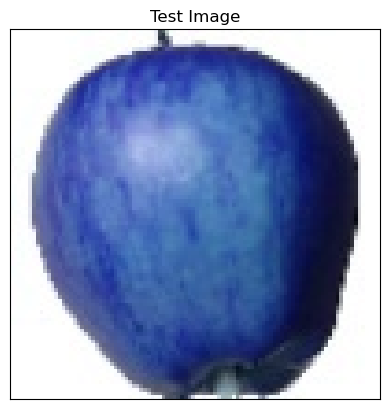

In [4]:
import cv2
img_path = "test/Apple/Apple Red 1/321_100.jpg" 
img = cv2.imread(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

<ul><li style="font-size:24px; font-weight:bold">Testing Model</li></ul>

In [5]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    "test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 22688 files belonging to 67 classes.


In [6]:
Labels = testing_set.class_names

In [7]:
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Converting Single Image To Batch
prediction = model.predict(input_arr)
prediction

1/1 [==============================] - 0s 418ms/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.0831031e-25, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.1169777e-31,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [8]:
result_idx = np.argmax(prediction[0])

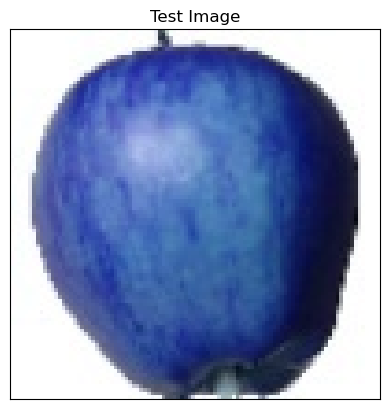

In [9]:
# Displaying The Image Again
img_path = "test/Apple/Apple Red 1/321_100.jpg" 
img = cv2.imread(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
print("It is = {}".format(Labels[result_idx]))

It is = Apple


<ul><li style="font-size:24px; font-weight:bold">Predicting More Images</li></ul>

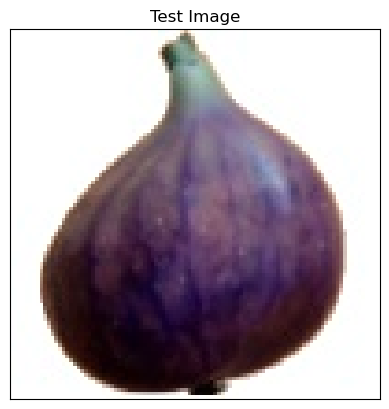

In [11]:
# Image
img_path = "test/Fig/176_100.jpg" 
img = cv2.imread(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
prediction = model.predict(input_arr)
prediction

1/1 [==============================] - 0s 41ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [13]:
result = np.argmax(prediction)
result

18

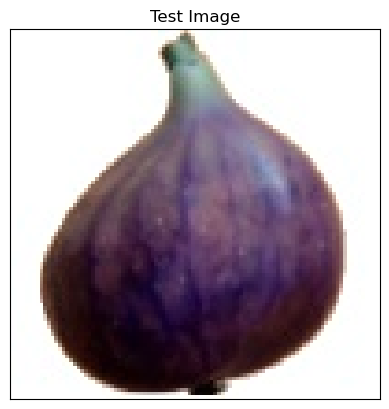

In [14]:
img_path = "test/Fig/176_100.jpg" 
img = cv2.imread(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
print("It is = {}".format(Labels[result]))

It is = Fig


<ul><li style="font-size:24px; font-weight:bold">Predicting The Whole Test Set</li></ul>

In [16]:
prediction = model.predict(testing_set)
prediction

709/709 [==============================] - 101s 142ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
for i in range(5):
    print("{} image is = {}".format(i+1, Labels[np.argmax(prediction[i])]))

1 image is = Pear
2 image is = Grape
3 image is = Rambutan
4 image is = Plum
5 image is = Cocos
